In [1]:
import pandas as pd
import os

In [2]:
import pickle

In [3]:
edu_car_df = pd.read_csv('../../clean_data/only_name_edu_car.csv', index_col=0)

In [4]:
edu_car_df.head()

,goal_name,goal_name_key_pos,goal_weight,goal_words,goal_aver_word_len,goal_verbs_counter,goal_nouns_counter,goal_numr_counter,goal_adj_counter,goal_digit_counter,label_education,label_attractor_career
25,повысить уровень знаний возможности компьютера,повысить уровень знание возможность компьютер,1.2060,5,8.4,1,4,0,0,0,0,1
70,познание инноваций,познание инновация,0.6429,2,8.5,0,2,0,0,0,1,0
124,fdd,NaN,0.0000,1,3.0,0,0,0,0,0,0,0
136,знания,знание,0.0123,1,6.0,0,1,0,0,0,1,0
172,получить больше знаний и умений,получить знание умение,0.0944,5,5.4,1,2,0,0,0,0,0


In [5]:
edu_car = edu_car_df.copy()

In [6]:
edu_car_text_vectors = edu_car[['goal_name_key_pos', 'label_education', 'label_attractor_career']]
edu_car_features = edu_car.drop(columns=['goal_name', 'goal_name_key_pos'])

In [7]:
from sklearn.model_selection import train_test_split

### Career

#### Features approach

In [8]:
car_features = edu_car_features.drop(columns=['label_education'])

In [9]:
X = car_features.drop('label_attractor_career', axis=1)
y = car_features['label_attractor_career']

In [10]:
X.shape

(899, 8)

In [11]:
y.shape

(899,)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
X_train.head()

,goal_weight,goal_words,goal_aver_word_len,goal_verbs_counter,goal_nouns_counter,goal_numr_counter,goal_adj_counter,goal_digit_counter
16946,2.1651,4,6.50,1,2,0,1,0
13196,0.3646,6,5.67,2,2,0,1,0
16543,0.6667,2,7.50,1,1,0,0,0
11362,0.0661,2,10.00,0,1,0,1,0
4642,1.0059,11,7.18,0,5,0,3,0


In [14]:
from sklearn.preprocessing import MinMaxScaler

In [15]:
mms = MinMaxScaler()

In [16]:
X_train_scaled = mms.fit_transform(X_train)

In [17]:
X_test_scaled = mms.fit_transform(X_test)

In [18]:
from xgboost import XGBClassifier

In [19]:
car_xgb = XGBClassifier()

In [20]:
car_xgb.fit(X_train_scaled, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [21]:
y_pred = car_xgb.predict(X_test_scaled)

In [22]:
from sklearn.metrics import classification_report, accuracy_score, f1_score, roc_auc_score

In [23]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.65      0.77      0.71       114
           1       0.42      0.29      0.34        66

    accuracy                           0.59       180
   macro avg       0.54      0.53      0.52       180
weighted avg       0.57      0.59      0.57       180



In [24]:
accuracy_score(y_test, y_pred)

0.5944444444444444

In [25]:
f1_score(y_test, y_pred)

0.34234234234234234

In [26]:
roc_auc_score(y_test, y_pred)

0.5299043062200957

In [32]:
with open('models/career_feat_xgb.pkl', 'wb') as f:
    pickle.dump(car_xgb, f)

#### Vectors approach

In [27]:
car_vectors = edu_car_text_vectors.drop(columns=['label_education'])

In [28]:
car_vectors.dropna(inplace=True)

In [29]:
car_vectors.columns

Index(['goal_name_key_pos', 'label_attractor_career'], dtype='object')

In [30]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [31]:
text = car_vectors['goal_name_key_pos']
y = car_vectors['label_attractor_career']

In [32]:
text

25           повысить уровень знание возможность компьютер
70                                      познание инновация
136                                                 знание
172                                 получить знание умение
291                                изучить английский язык
                               ...                        
17982                                  отдалиться молодёжь
17983                найти интересный работа работать мозг
17991                              быть интересный общение
18015    получить сертификат эксперт региональный чемпи...
18017                                закончить аспирантура
Name: goal_name_key_pos, Length: 876, dtype: object

In [33]:
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(text)

In [34]:
X.shape

(876, 893)

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [36]:
X_train

<700x893 sparse matrix of type '<class 'numpy.float64'>'
	with 2161 stored elements in Compressed Sparse Row format>

In [37]:
car_v_xgb = XGBClassifier()

In [38]:
car_v_xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [39]:
y_pred = car_v_xgb.predict(X_test)

In [40]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.63      0.80      0.71       110
           1       0.41      0.23      0.29        66

    accuracy                           0.59       176
   macro avg       0.52      0.51      0.50       176
weighted avg       0.55      0.59      0.55       176



In [41]:
accuracy_score(y_test, y_pred)

0.5852272727272727

In [42]:
f1_score(y_test, y_pred)

0.2912621359223301

In [43]:
roc_auc_score(y_test, y_pred)

0.5136363636363637

In [49]:
with open('models/career_vect_xgb.pkl', 'wb') as f:
    pickle.dump(car_v_xgb, f)

#### Neural net approach

In [44]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Embedding,Dropout
from tensorflow.keras.layers import Conv1D, MaxPooling1D, GlobalMaxPooling1D 

In [45]:
text = car_vectors['goal_name_key_pos']
y = car_vectors['label_attractor_career']

In [46]:
token = Tokenizer()
token.fit_on_texts(text)

In [47]:
vocab_size = len(token.word_index) + 1
vocab_size

900

In [48]:
encoded_text = token.texts_to_sequences(text)

In [49]:
max_len = int()
for i in encoded_text:
    len_ = len(i)
    if len_ > max_len:
        max_len = len_
        
max_len

21

In [50]:
max_length = 21
X = pad_sequences(encoded_text, maxlen=max_length, padding='post')

In [51]:
X.shape

(876, 21)

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [53]:
vec_size = 100

model = Sequential()
model.add(Embedding(vocab_size, vec_size, input_length=max_length))

model.add(Conv1D(32, 2, activation='relu'))
model.add(MaxPooling1D(2))
model.add(Dropout(0.5))

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(16, activation='relu'))

model.add(GlobalMaxPooling1D())

model.add(Dense(1, activation='sigmoid'))

In [54]:
%%time
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Wall time: 34.9 ms


In [55]:
import numpy as np

In [56]:
X_train = np.asarray(X_train)
y_train = np.asarray(y_train)
X_test= np.asarray(X_test)
y_test = np.asarray(y_test)

In [57]:
from tensorflow.keras.callbacks import EarlyStopping

In [58]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [59]:
model.fit(X_train, y_train, epochs=600, validation_data=(X_test, y_test), callbacks=[early_stop])

Train on 700 samples, validate on 176 samples
Epoch 1/600
700/700 [==============================] - 1s 2ms/sample - loss: 0.6758 - accuracy: 0.6186 - val_loss: 0.6701 - val_accuracy: 0.6250
Epoch 2/600
700/700 [==============================] - 0s 209us/sample - loss: 0.6643 - accuracy: 0.6243 - val_loss: 0.6677 - val_accuracy: 0.6250
Epoch 3/600
700/700 [==============================] - 0s 207us/sample - loss: 0.6673 - accuracy: 0.6243 - val_loss: 0.6709 - val_accuracy: 0.6250
Epoch 4/600
700/700 [==============================] - 0s 204us/sample - loss: 0.6611 - accuracy: 0.6243 - val_loss: 0.6692 - val_accuracy: 0.6250
Epoch 5/600
700/700 [==============================] - 0s 202us/sample - loss: 0.6659 - accuracy: 0.6243 - val_loss: 0.6717 - val_accuracy: 0.6250
Epoch 6/600
700/700 [==============================] - 0s 208us/sample - loss: 0.6630 - accuracy: 0.6243 - val_loss: 0.6696 - val_accuracy: 0.6250
Epoch 7/600
700/700 [==============================] - 0s 204us/sample - l

In [60]:
losses = pd.DataFrame(model.history.history)

In [61]:
losses[['accuracy','val_accuracy']].plot()

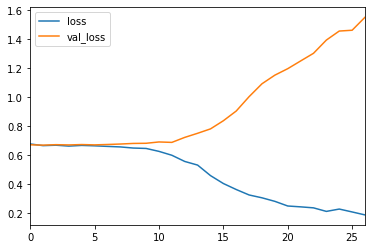

In [62]:
losses[['loss','val_loss']].plot()

In [63]:
print(model.metrics_names)
print(model.evaluate(X_test,y_test,verbose=0))

['loss', 'accuracy']
[1.5527713082053445, 0.57954544]


In [64]:
y_pred = model.predict_classes(X_test)

In [65]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.68      0.67       110
           1       0.44      0.41      0.42        66

    accuracy                           0.58       176
   macro avg       0.55      0.55      0.55       176
weighted avg       0.57      0.58      0.58       176



In [66]:
accuracy_score(y_test, y_pred)

0.5795454545454546

In [67]:
f1_score(y_test, y_pred)

0.421875

In [68]:
roc_auc_score(y_test, y_pred)

0.5454545454545455

In [75]:
model.save("models/career_vect_nn.h5")